<a href="https://colab.research.google.com/github/ryooz16/klasifikasi-menggunakan-algoritma-random-forest/blob/main/Wine.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import load_wine
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report

In [2]:
wine = load_wine(as_frame=True)
df = wine.frame

display(df.head())


,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0


In [3]:
X = df.drop('target', axis=1)
y = df['target']


In [4]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.25, random_state=42)

In [6]:
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [7]:
y_pred = model.predict(X_test)

print("\n📊 Classification Report:\n")
print(classification_report(y_test, y_pred, target_names=wine.target_names))


📊 Classification Report:

              precision    recall  f1-score   support

     class_0       1.00      1.00      1.00        15
     class_1       1.00      1.00      1.00        18
     class_2       1.00      1.00      1.00        12

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45



In [14]:
importances = model.feature_importances_
feat_df = pd.DataFrame({
    'Fitur': wine.feature_names,
    'Penting': importances
}).sort_values(by='Penting', ascending=False)
feat_df

,Fitur,Penting
6,flavanoids,0.197865
9,color_intensity,0.184310
0,alcohol,0.141665
12,proline,0.137054
11,od280/od315_of_diluted_wines,0.097526
10,hue,0.063883
5,total_phenols,0.039662
3,alcalinity_of_ash,0.032448
4,magnesium,0.031750
1,malic_acid,0.030407


/tmp/ipython-input-12-3513318149.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Penting', y='Fitur', data=feat_df, palette='viridis')


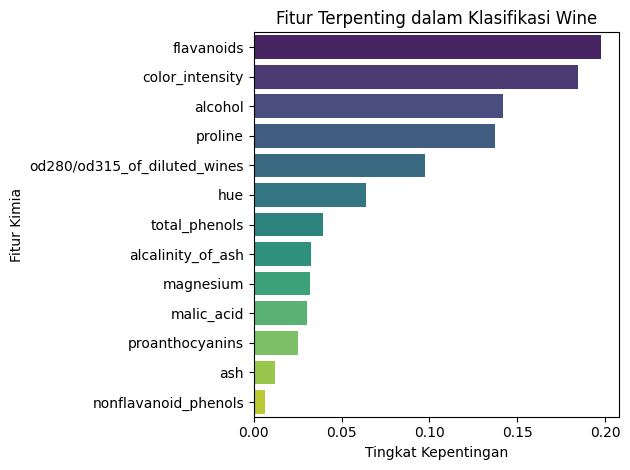

In [12]:
sns.barplot(x='Penting', y='Fitur', data=feat_df, palette='viridis')
plt.title("Fitur Terpenting dalam Klasifikasi Wine")
plt.xlabel("Tingkat Kepentingan")
plt.ylabel("Fitur Kimia")
plt.tight_layout()
plt.show()